In [117]:
import pandas as pd
import numpy as np



In [118]:
df = pd.read_csv("Indicators_of_Anxiety_or_Depression.csv")

In [119]:
df1 = df.copy()

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [121]:
df1.shape

(16092, 14)

In [122]:
df1.describe()

,Time Period,Value,Low CI,High CI
count,16092.000000,15386.000000,15386.000000,15386.000000
mean,34.392617,28.583979,25.058735,32.358612
std,20.681589,8.775480,8.446655,9.282907
min,1.000000,4.700000,3.300000,6.000000
25%,16.000000,22.700000,19.300000,26.100000
50%,35.000000,28.100000,24.500000,32.000000
75%,52.000000,33.600000,30.000000,37.700000
max,69.000000,85.200000,79.900000,89.500000


In [123]:
df1.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [124]:
df1.columns


Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

## Data Preparation:

    Load and Clean Data:
        Load the dataset into a pandas DataFrame.
        Check for and handle any missing values or inconsistencies.
        Convert time-related columns to appropriate datetime formats.

In [125]:
df1.isna().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      706
Low CI                     706
High CI                    706
Confidence Interval        706
Quartile Range            5534
dtype: int64

In [126]:
df1["Quartile Range"].unique()

array([nan, '16.5 - 20.7', '22.2 - 24.0', '24.1 - 28.7', '20.8 - 22.1',
       '21.7 - 27.8', '31.7 - 37.0', '30.4 - 31.6', '27.9 - 30.3',
       '25.6 - 33.3', '34.8 - 36.7', '36.8 - 41.4', '33.4 - 34.7',
       '20.7 - 23.0', '23.1 - 25.6', '25.7 - 35.5', '16.7 - 20.6',
       '26.3 - 28.7', '31.6 - 38.3', '28.8 - 31.5', '20.3 - 26.2',
       '30.6 - 33.4', '33.5 - 36.0', '36.1 - 48.4', '26.1 - 30.5',
       '18.1-20.7', '23.3-25.6', '25.7-36.4', '20.8-23.2', '19.0-25.2',
       '25.3-27.4', '28.9-36.1', '27.5-28.8', '23.8-29.7', '32.6-34.9',
       '29.8-32.5', '35.0-44.3', '17.2-20.9', '25.9-31.1', '23.0-25.8',
       '21.0-22.9', '24.8-28.6', '30.7-36.0', '28.7-30.6', '19.6-24.7',
       '24.8-29.5', '35.6-41.4', '33.2-35.5', '29.6-33.1', '26.9-31.8',
       '24.4-26.8', '21.5-24.3', '17.0-21.4', '29.7-31.7', '18.4-26.7',
       '26.8-29.6', '31.8-37.1', '37.0-40.0', '26.0-31.6', '31.7-34.2',
       '34.3-36.9', '27.3-30.3', '21.3-25.0', '25.1-27.2', '14.7-21.2',
       '32.8-36.3

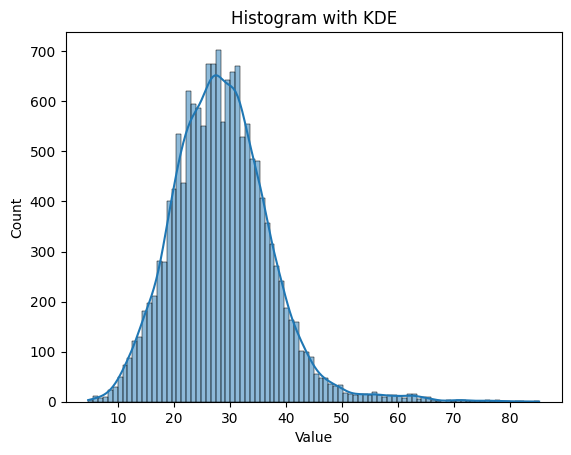

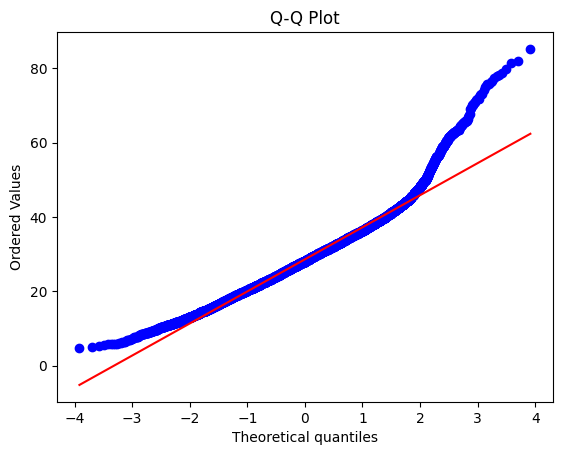

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
sns.histplot(df1['Value'], kde=True)
plt.title('Histogram with KDE')
plt.show()

# Q-Q Plot
stats.probplot(df1['Value'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [128]:
# for consistent or easy - convert all text in lowercase
df1.columns = df1.columns.str.lower()

In [129]:
mean_val = df1[["value","low ci","high ci"]].mean().round(2)
mean_val

value      28.58
low ci     25.06
high ci    32.36
dtype: float64

In [130]:
df1[["value","low ci","high ci"]]= mean_val.fillna({"value" : "mean"})

In [131]:
df1["mean ci"] = (df1["low ci"] + df1["high ci"]).mean().round(2)

In [132]:
df1.dtypes

indicator                  object
group                      object
state                      object
subgroup                   object
phase                      object
time period                 int64
time period label          object
time period start date     object
time period end date       object
value                     float64
low ci                    float64
high ci                   float64
confidence interval        object
quartile range             object
mean ci                   float64
dtype: object

In [133]:
df1.duplicated() # duplicates check

0        False
1        False
2        False
3        False
4        False
         ...  
16087    False
16088    False
16089    False
16090    False
16091    False
Length: 16092, dtype: bool

In [134]:
df1["confidence interval"].unique()

array(['22.7 - 24.3', '30.2 - 35.2', '24.1 - 27.3', ..., '16.6 - 27.3',
       '17.5 - 23.4', '15.6 - 22.6'], dtype=object)

In [135]:
df1["confidence interval"]

0        22.7 - 24.3
1        30.2 - 35.2
2        24.1 - 27.3
3        23.3 - 26.2
4        21.5 - 25.0
            ...     
16087    17.9 - 23.8
16088    17.5 - 23.4
16089    19.2 - 26.8
16090    15.6 - 22.6
16091    15.8 - 25.5
Name: confidence interval, Length: 16092, dtype: object

In [136]:
df1[['low ci', 'high ci',"mean ci"]]

,low ci,high ci,mean ci
0,25.06,32.36,57.42
1,25.06,32.36,57.42
2,25.06,32.36,57.42
3,25.06,32.36,57.42
4,25.06,32.36,57.42
...,...,...,...
16087,25.06,32.36,57.42
16088,25.06,32.36,57.42
16089,25.06,32.36,57.42
16090,25.06,32.36,57.42


In [137]:
df1.columns

Index(['indicator', 'group', 'state', 'subgroup', 'phase', 'time period',
       'time period label', 'time period start date', 'time period end date',
       'value', 'low ci', 'high ci', 'confidence interval', 'quartile range',
       'mean ci'],
      dtype='object')

In [138]:
df1.shape

(16092, 15)

In [139]:
df1 = df1.drop(['quartile range',
       'ci_lower', 'ci_upper', 'ci_mean'], axis =1)

KeyError: "['ci_lower', 'ci_upper', 'ci_mean'] not found in axis"

In [ ]:
df1.shape

In [ ]:
df1.info()

## date Time series 

In [141]:
df1[["time period start date","time period end date"]]

,time period start date,time period end date
0,04/23/2020,05/05/2020
1,04/23/2020,05/05/2020
2,04/23/2020,05/05/2020
3,04/23/2020,05/05/2020
4,04/23/2020,05/05/2020
...,...,...
16087,05/28/2024,06/24/2024
16088,05/28/2024,06/24/2024
16089,05/28/2024,06/24/2024
16090,05/28/2024,06/24/2024


In [171]:
# Convert time-related columns to appropriate datetime formats.
df1["time period start date"] = pd.to_datetime(df1['time period start date'],errors='coerce')
df1["time period end date"] = pd.to_datetime(df1['time period end date'], errors='coerce')


In [172]:
df1[["time period start date","time period end date"]]

,time period start date,time period end date
time period start date,,
2020-04-23,2020-04-23,2020-05-05
2020-04-23,2020-04-23,2020-05-05
2020-04-23,2020-04-23,2020-05-05
2020-04-23,2020-04-23,2020-05-05
2020-04-23,2020-04-23,2020-05-05
...,...,...
2024-05-28,2024-05-28,2024-06-24
2024-05-28,2024-05-28,2024-06-24
2024-05-28,2024-05-28,2024-06-24


In [144]:
# Extract specific components such as year, month, day, etc.
df1["start_year"] = df1['time period start date'].dt.year
df1["start_month"] = df1['time period start date'].dt.month
df1["start_day"] = df1['time period start date'].dt.day

df1["end_year"] = df1['time period end date'].dt.year
df1["end_month"] = df1['time period end date'].dt.month
df1["end_day"] = df1['time period end date'].dt.day

In [145]:
df1.head()

,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,high ci,confidence interval,quartile range,mean ci,start_year,start_month,start_day,end_year,end_month,end_day
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,32.36,22.7 - 24.3,NaN,57.42,2020,4,23,2020,5,5
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,32.36,30.2 - 35.2,NaN,57.42,2020,4,23,2020,5,5
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,32.36,24.1 - 27.3,NaN,57.42,2020,4,23,2020,5,5
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,32.36,23.3 - 26.2,NaN,57.42,2020,4,23,2020,5,5
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,32.36,21.5 - 25.0,NaN,57.42,2020,4,23,2020,5,5


In [146]:
#Compute the difference between two dates to get the duration.
df1["duration"] = df1['time period start date'] - df1['time period end date']

In [147]:
df1[["duration",'time period start date','time period end date']]


,duration,time period start date,time period end date
0,-12 days,2020-04-23,2020-05-05
1,-12 days,2020-04-23,2020-05-05
2,-12 days,2020-04-23,2020-05-05
3,-12 days,2020-04-23,2020-05-05
4,-12 days,2020-04-23,2020-05-05
...,...,...,...
16087,-27 days,2024-05-28,2024-06-24
16088,-27 days,2024-05-28,2024-06-24
16089,-27 days,2024-05-28,2024-06-24
16090,-27 days,2024-05-28,2024-06-24


In [149]:
# extract duration in days
df1["duration_days"]= df1["duration"].dt.days
df1[["duration_days","duration"]]

,duration_days,duration
0,-12,-12 days
1,-12,-12 days
2,-12,-12 days
3,-12,-12 days
4,-12,-12 days
...,...,...
16087,-27,-27 days
16088,-27,-27 days
16089,-27,-27 days
16090,-27,-27 days


In [158]:
df1["time period start date"].unique()

<DatetimeArray>
['2020-04-23 00:00:00', '2020-05-07 00:00:00', '2020-05-14 00:00:00',
 '2020-05-21 00:00:00', '2020-05-28 00:00:00', '2020-06-04 00:00:00',
 '2020-06-11 00:00:00', '2020-06-18 00:00:00', '2020-06-25 00:00:00',
 '2020-07-02 00:00:00', '2020-07-09 00:00:00', '2020-07-16 00:00:00',
 '2020-07-22 00:00:00', '2020-08-19 00:00:00', '2020-09-02 00:00:00',
 '2020-09-16 00:00:00', '2020-09-30 00:00:00', '2020-10-14 00:00:00',
 '2020-10-28 00:00:00', '2020-11-11 00:00:00', '2020-11-25 00:00:00',
 '2020-12-09 00:00:00', '2020-12-22 00:00:00', '2021-01-06 00:00:00',
 '2021-01-20 00:00:00', '2021-02-03 00:00:00', '2021-02-17 00:00:00',
 '2021-03-03 00:00:00', '2021-03-17 00:00:00', '2021-03-30 00:00:00',
 '2021-04-14 00:00:00', '2021-04-28 00:00:00', '2021-05-12 00:00:00',
 '2021-05-26 00:00:00', '2021-06-09 00:00:00', '2021-06-23 00:00:00',
 '2021-07-06 00:00:00', '2021-07-21 00:00:00', '2021-08-04 00:00:00',
 '2021-08-18 00:00:00', '2021-09-01 00:00:00', '2021-09-15 00:00:00',
 '20

In [161]:
# filter data by date
# filter bsed on specific range
filtered_df= df1[df1["time period start date"].dt.year == 2024]
filtered_df


,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,quartile range,mean ci,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
14634,Symptoms of Depressive Disorder,National Estimate,United States,United States,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14635,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14636,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14637,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14638,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,19.2-20.8,57.42,2024,5,28,2024,6,24,-27 days,-27
16088,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,19.2-20.8,57.42,2024,5,28,2024,6,24,-27 days,-27
16089,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,22.4-24.6,57.42,2024,5,28,2024,6,24,-27 days,-27
16090,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,14.8-19.1,57.42,2024,5,28,2024,6,24,-27 days,-27


In [163]:
# Filter data between two dates
start_date = '2024-01-01'
end_date = '2024-03-31'
filtered_df = df1[(df1['time period start date'] >= start_date) & (df1['time period end date'] <= end_date)]
filtered_df

,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,quartile range,mean ci,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
14634,Symptoms of Depressive Disorder,National Estimate,United States,United States,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14635,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14636,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14637,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
14638,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,28.58,...,NaN,57.42,2024,1,9,2024,2,5,-27 days,-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,28.58,...,21.0-23.3,57.42,2024,2,6,2024,3,4,-27 days,-27
15152,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,28.58,...,19.0-20.9,57.42,2024,2,6,2024,3,4,-27 days,-27
15153,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,28.58,...,16.4-18.9,57.42,2024,2,6,2024,3,4,-27 days,-27
15154,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,28.58,...,16.4-18.9,57.42,2024,2,6,2024,3,4,-27 days,-27


In [169]:
# Resample data to a different frequency (e.g., monthly, yearly) and aggregate values.
df1.set_index(df1["time period start date"], inplace = True)

In [175]:
df1["time period start date"].dtype

dtype('<M8[ns]')

In [177]:
# resampled_monthly = df1.resample('M').mean()
select_numeric = df1.select_dtypes(include = ["number"])
resampled_monthly = df1.resample('M').mean()

TypeError: Could not convert Symptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Depressive DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive DisorderSymptoms of Anxiety Disorder or Depressive Disorder to numeric